In [11]:
from utils import ops_data as data, disc_to_cont
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
import numpy as np

(-0.5, 289.5, 3.5, -0.5)

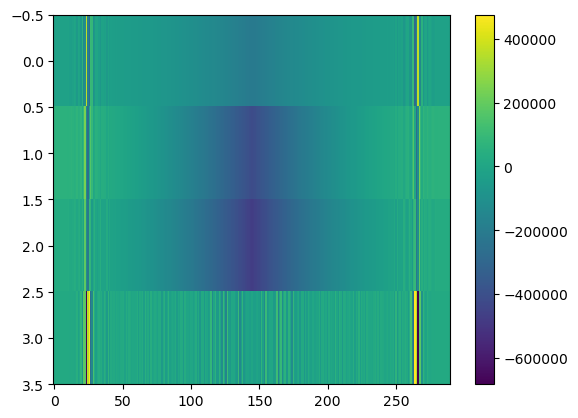

In [12]:
def A(xi, E):
    """
    Get the matrix such that u_hat = [A] f_hat

    Args:
        xi (float): a single Nyquist frequency
        E (float): the Young's modulus
    """

    return (
        data.K
        + (2 * np.pi * 1j * xi) * (data.a0 * data.M + data.a1 * data.k_basis * E)
        + (2 * np.pi * 1j * xi) ** 2 * data.M
    )

freq = np.fft.fftfreq(data.n, data.dt)
u_hat = np.fft.fft(data.u)
f_hat = np.fft.fft(data.f_adjusted)

bad = np.zeros((4, len(freq)), dtype=np.complex128)
for idx in range(len(freq)):
    xi = freq[idx]
    u_h = u_hat[:, idx].reshape(-1, 1)
    f_h = f_hat[:, idx].reshape(-1, 1)
    A_ = A(xi, data.Y)

    # residual = data.M @ np.fft.fft(data.d2u_dt2) + data.C @ np.fft.fft(data.du_dt) + data.K @ np.fft.fft(data.u) - np.fft.fft(data.f_adjusted)
    residual = A(xi, data.Y) @ u_h - f_h
    bad[:, idx] = residual.squeeze()
plt.imshow(bad.real, interpolation='None')
plt.colorbar()
plt.axis('auto')

In [33]:
vals = []
for idx in range(len(freq)):
    def func(E):
        mat = A(freq[idx], E * 1e7)
        mat = np.linalg.inv(mat)

        row = mat[0].squeeze()
        f = f_hat[:, idx].squeeze()
        u = u_hat[0, idx]

        residual = u - np.dot(row, f)
        return residual

    E = fsolve(func, data.Y * 1e-7, maxfev=int(1e8))
    vals.append(E)

np.argmin(np.abs(vals-data.Y*1e-7))
vals[0]

c:\Users\aglor\anaconda3\envs\ML\Lib\site-packages\scipy\optimize\_minpack_py.py:240: ComplexWarning: Casting complex values to real discards the imaginary part
  retval = _minpack._hybrd(func, x0, args, 1, xtol, maxfev,
c:\Users\aglor\anaconda3\envs\ML\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\aglor\anaconda3\envs\ML\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([6.92307692])